참고자료 : 공공데이터로 파이썬 데이터 분석 시작하기 - 박조은https://www.inflearn.com/course/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0/dashboard


# 전국 신규 민간 아파트 분양 가격 동향

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 최근 분양가 파일 데이터 로드

df_last = pd.read_csv('주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding = 'cp949')

In [3]:
df_last.shape

(4335, 5)

In [4]:
# 파일 미리보기

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


## 데이터셋

### 2015년 부터 최근까지의 데이터 로드

In [6]:
# encoding = "cp949" 한글 파일이 안될 경우 설정한다. 한글 인코딩 = cp949, euc-kr

df_first = pd.read_csv('전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding = 'cp949')
df_first.shape

(17, 22)

In [7]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하기

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

In [10]:
# 결측치 isnull, isna   True == 1, False == 0

df_last.isnull().sum() 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [11]:
df_last.isnull() 

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


### 데이터 타입 변경

In [12]:
# 데이터 타입 변경 to_numeric

df_last["분양가격"]= pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last["분양가격"].mean()

3238.128632802628

In [13]:
df_last.describe()

,연도,월,분양가격
count,4335.000000,4335.000000,3957.000000
mean,2017.352941,6.764706,3238.128633
std,1.234035,3.518361,1264.309933
min,2015.000000,1.000000,1868.000000
25%,2016.000000,4.000000,2441.000000
50%,2017.000000,7.000000,2874.000000
75%,2018.000000,10.000000,3561.000000
max,2019.000000,12.000000,12728.000000


### 평당분양가격 구하기

In [14]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN


In [15]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


### 분양가격 구하기

In [16]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [17]:
# 변경 전 컬럼인 분양가격 (㎡) 컬럼 요약
    
df_last["분양가격(㎡)"].describe()

# unique = 중복되지 않는 값
# top =  가장 빈번
# freq = 가장 빈번한 문자 등장 횟수

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [18]:
# 수치데이터로 변경된 분양가격 컬럼 요약

df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경

In [19]:
 df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [20]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 컬럼 제거하기

In [21]:
# drop 사용시 axis에 유의
# axis 0 = 행, axis 1 = 열

df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [22]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [23]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## Groupby로 데이터 집계하기

In [24]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [25]:
# df.groupby(["인덱스로 사용할 컬럼명"]) ["계산할 컬럼 값"].연산()

df_last.groupby(["지역명"])["평당분양가격"].sum()

지역명
강원    1909561.5
경기    3339223.8
경남    2289388.2
경북    2018745.3
광주    2000258.7
대구    2899376.7
대전    2030160.0
부산    3021780.3
서울    5899994.1
세종    2321774.4
울산    1492220.4
인천    2931168.9
전남    1876198.5
전북    1915610.4
제주    2461839.6
충남    1967842.8
충북    1908663.9
Name: 평당분양가격, dtype: float64

In [26]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [27]:
# 전용면적으로 평당분양가격의 평균

df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [28]:
# 지역명, 전용면적으로 평당분양가격의 평균
# unstack () = 재구조화, 끝에 있는 인덱스가 컬럼값으로 온다.


df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [29]:
# 연도, 지역명으로 평당분양가격의 평균
# transpose() = 행과 열 바꿔준다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

# g.unstack().transpose()

## pivot table로 데이터 집계

In [30]:
# pd.pivot_table(df, values="D", index=["A"], columns=['C '])

pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"])

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [31]:
# df_last.groupby

df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [32]:
# df_pivot_table

pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [33]:
# 지역명, 전용면적으로 평당분양가격의 평균
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstakc().round()

df_last.pivot_table(index="전용면적", columns ="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [34]:
# 연도, 지역명으로 평당분양가격의 평균
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
    
p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
p.loc[2018]

# loc =행을 기준으로 가져온다. 


,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


## 데이터 시각화 하기

In [35]:
plt.rc("font", family="Malgun Gothic")

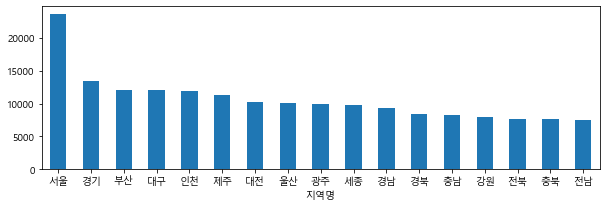

In [36]:
# 지역명으로 분양가격의 평균을 구하고 선그래프 시각화

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot.bar(rot=0, figsize=(10, 3))

# sort_values - 값 정렬
# rot - 누워 있는 글씨 세울 수 있다.
# figsize - 그래프 사이즈

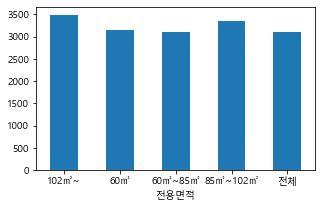

In [37]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화

df_last.groupby(["전용면적"])["분양가격"].mean().plot.bar(rot=0, figsize=(5, 3))


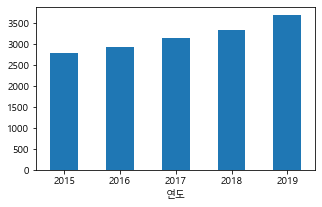

In [38]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화

df_last.groupby(["연도"])["분양가격"].mean().plot.bar(rot=0, figsize=(5, 3))


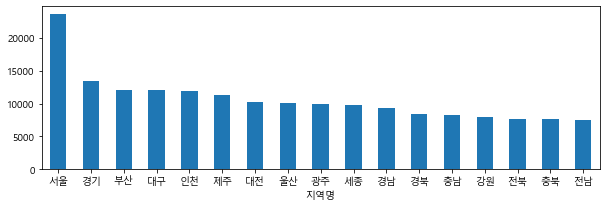

In [39]:
g.plot.bar(rot=0, figsize=(10, 3))

In [40]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

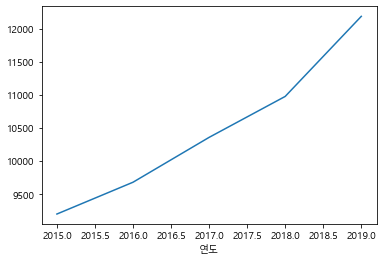

In [41]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### boxplot 그래프

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수, 중앙값
4. 제 3사분위수
5. 최댓값

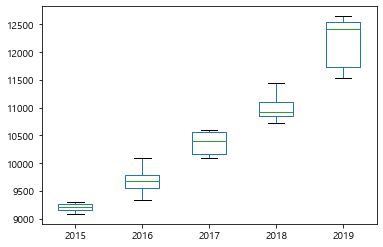

In [42]:
df_last.pivot_table(index="월",columns="연도", values="평당분양가격").plot.box()

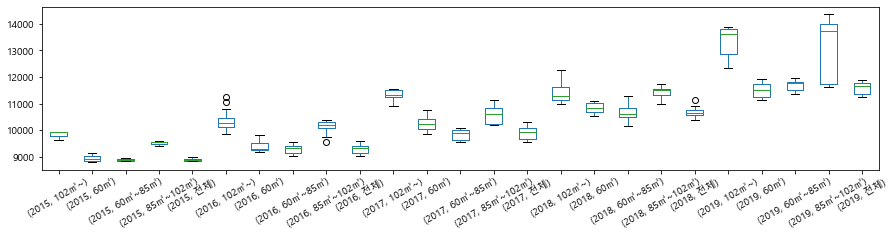

In [43]:
p = df_last.pivot_table(index="월",columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

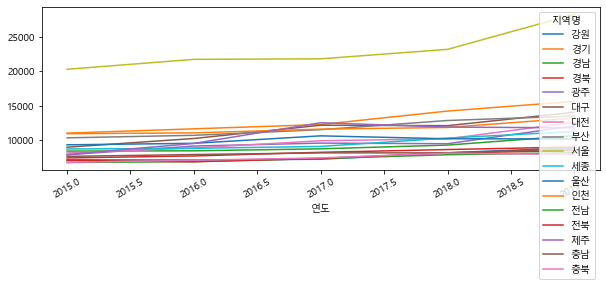

In [44]:
p = df_last.pivot_table(index="연도",columns="지역명", values="평당분양가격")
p.plot(figsize=(10, 3), rot=30)

  ### Seaborn으로 시각화

In [45]:
import seaborn as sns
%matplotlib inline

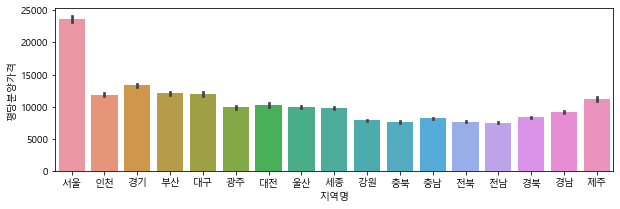

In [80]:
# barplot으로 지역별 평당분양가격

plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x = "지역명", y="평당분양가격" )

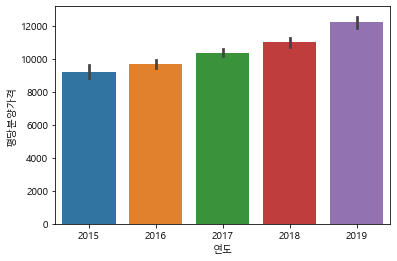

In [47]:
# barplot으로 연도별 평당분양가격

sns.barplot(data=df_last, x="연도", y="평당분양가격" )

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

legend 값

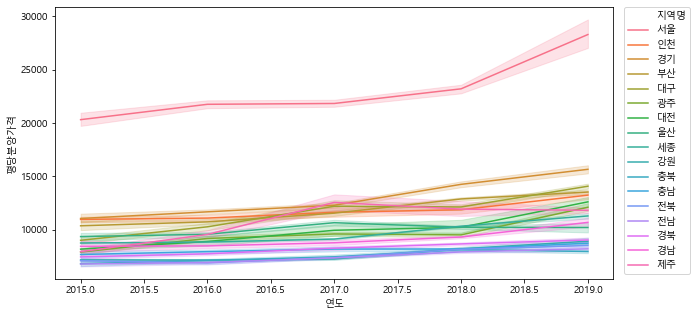

In [83]:
# lineplot으로 연도별 평당분양가격
# hue = 색상

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명" )
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

  
    
    

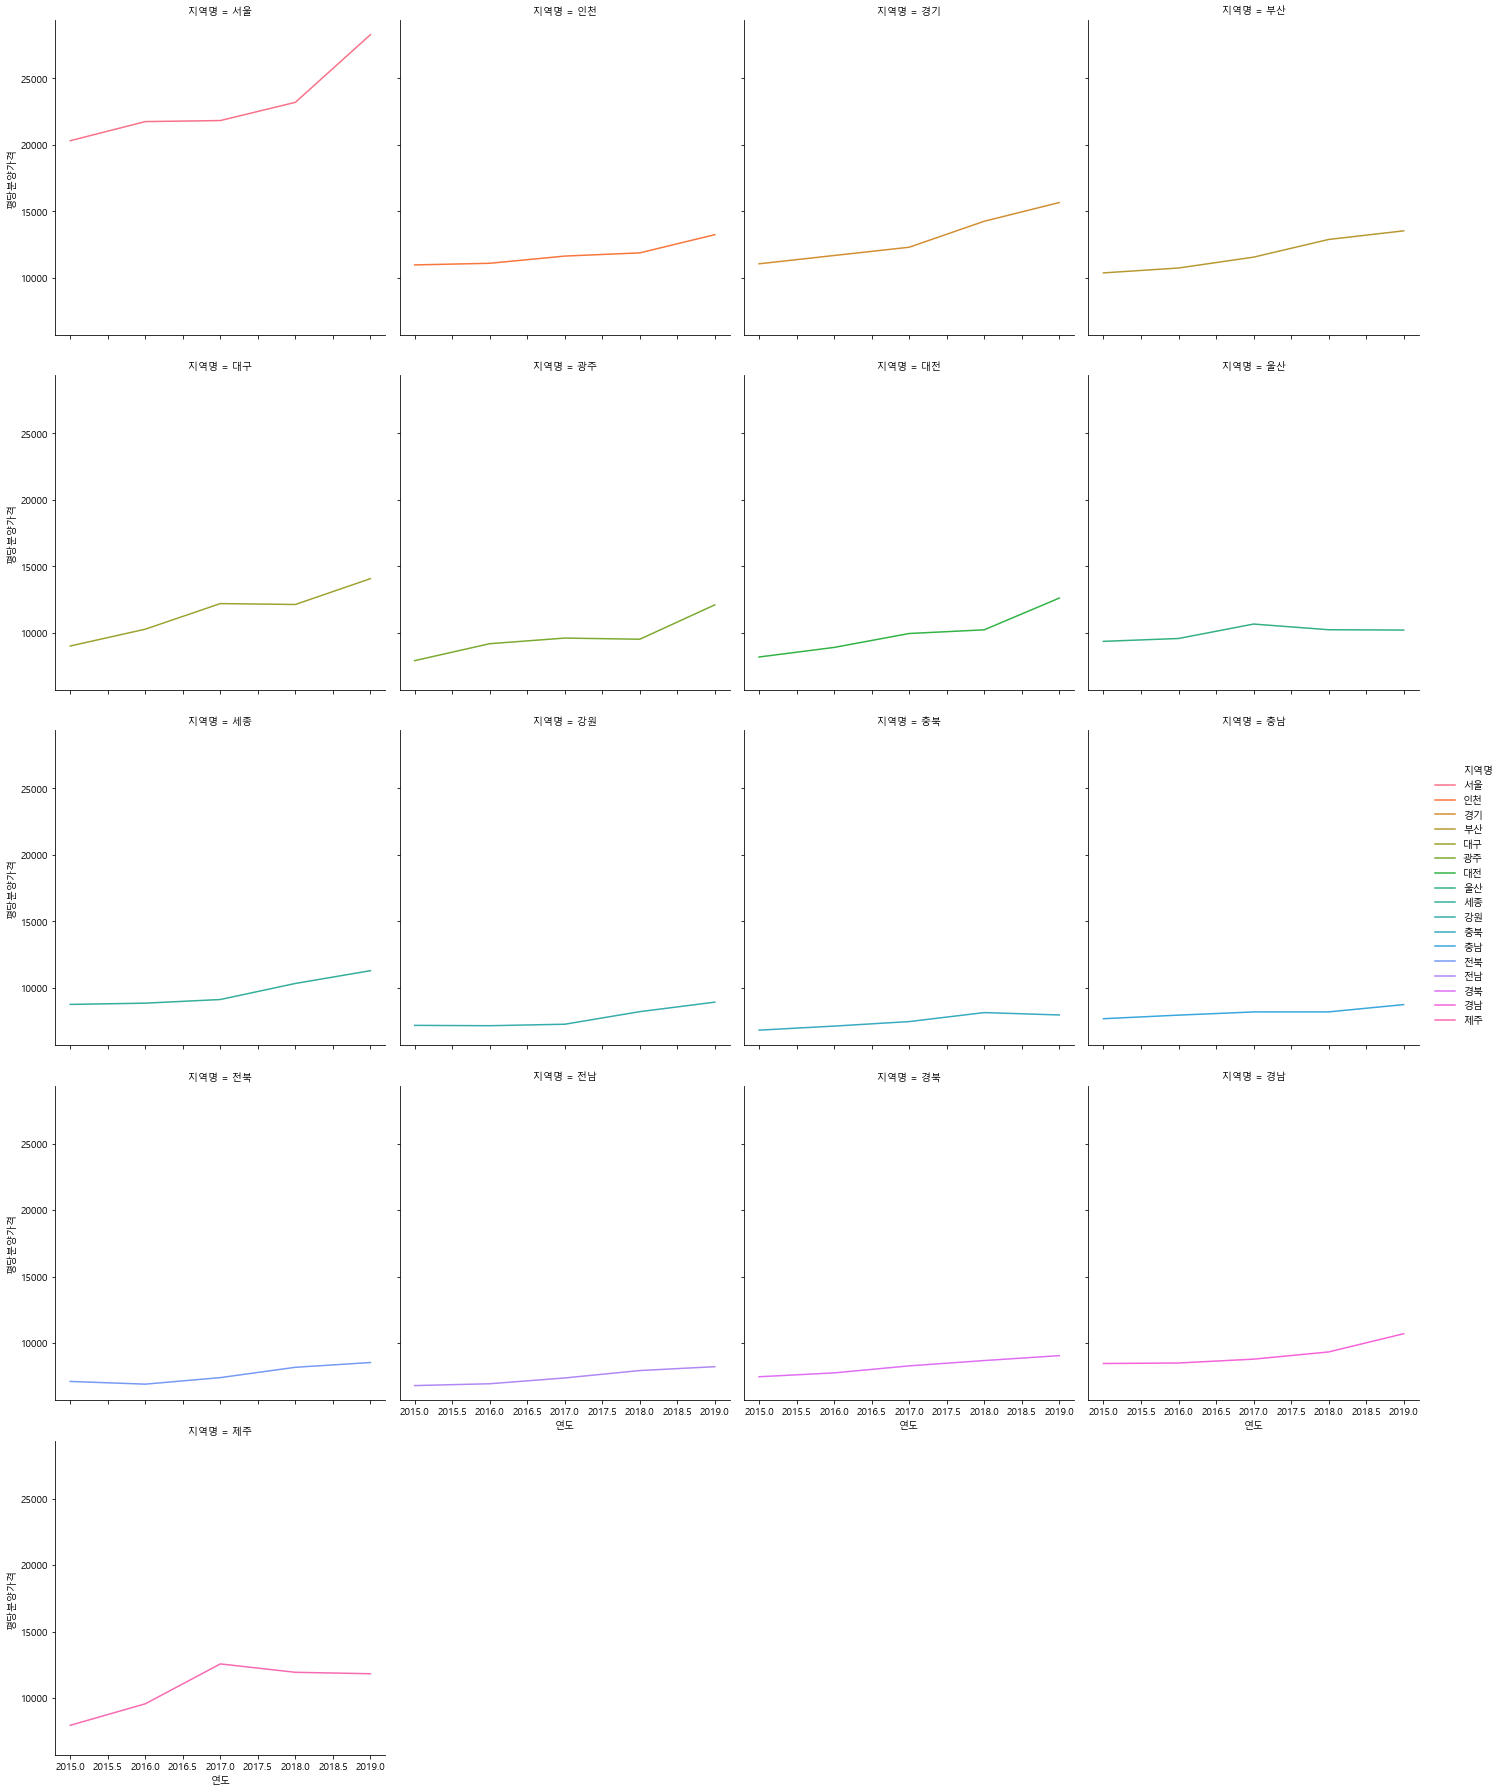

In [49]:
sns.relplot(data=df_last, x="연도",y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

### boxplot과 violinplot

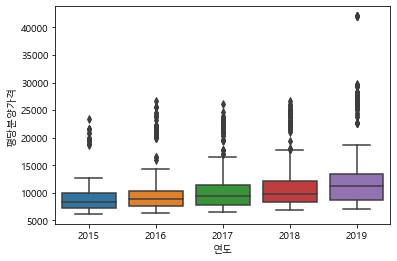

In [89]:
# 연도별 평당분양가격 boxplot
# 최솟값
# 제 1사분위수
# 제 2사분위수 = 중앙값
# 제 3사분위수
# 최댓값

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

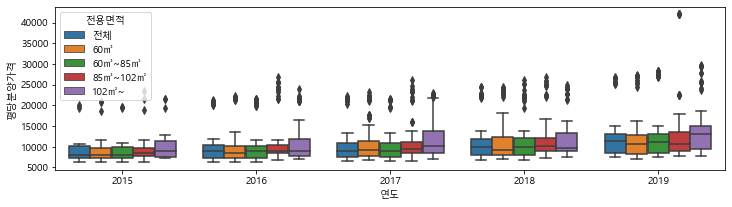

In [91]:
# hue 옵션을 주어 전용면적별로 다르게 표시

plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

autodeskresearch.com/publications/samestats

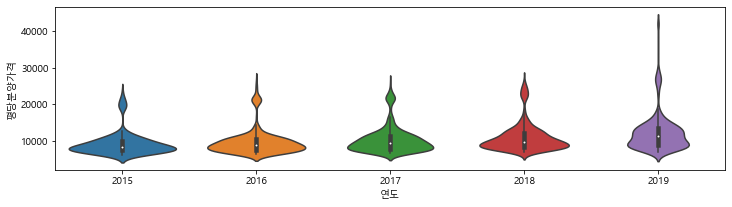

In [94]:
# 연도별 평당분양가격을 violinplot으로 그리기
# violinplot은 bxoplot 보완 그래프이다. 

plt.figure(figsize=(12, 3))
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

### lmplot과 swarmplot 

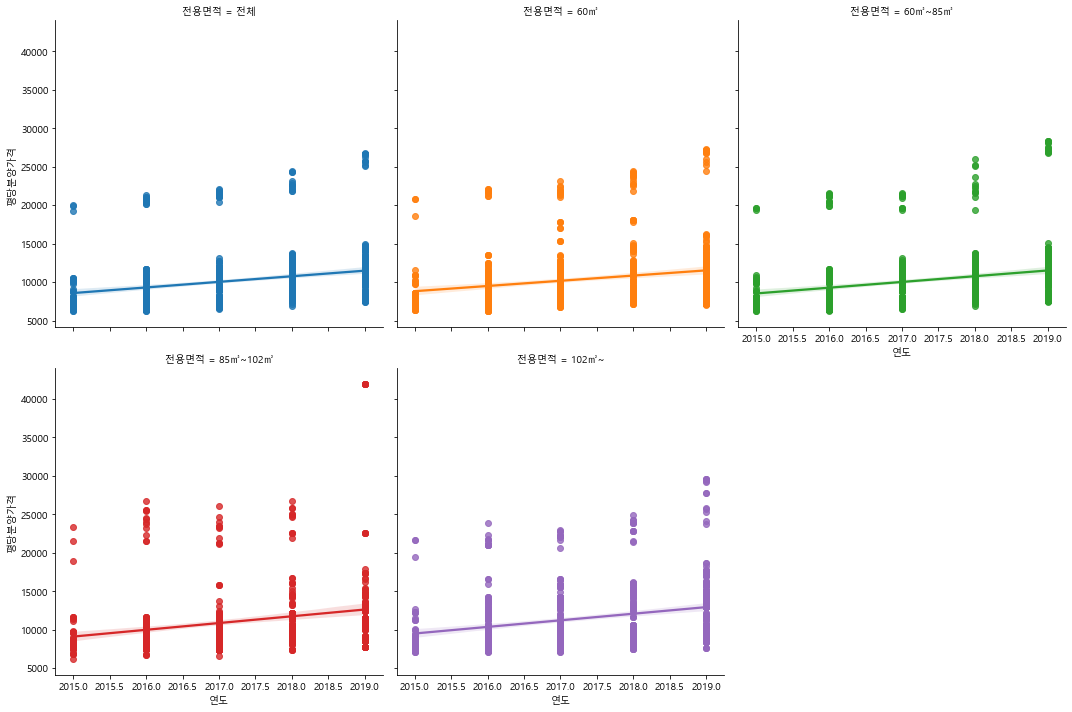

In [99]:
# 연도별 평당분양가격을 lmplot
# hue 옵션으로 전용면적

sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적",
          col="전용면적", col_wrap=3)


C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


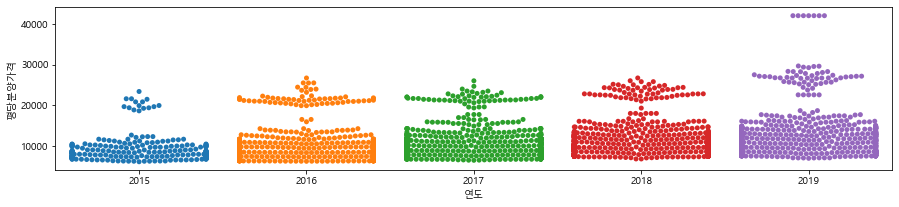

In [102]:
# 연도별 평당 분양가격을 swarmplot 그리기
# swarmplot은 범주형(카테고리) 데이터의 산점도 표현

plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

### 이상치 보기

In [54]:
# 평당분양가격의 최대값을 구해서 max_price 변수 담기

 df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [55]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [56]:
# 서울의 평당분양가격이 특히 높은 데이터가 있다. 

df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


 ### 수치데이터 히스토그램 

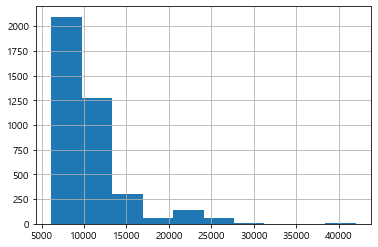

In [107]:
# 결측치가 없는 데이터에서 평당분양가격만 가져온다.


h = df_last["평당분양가격"].hist()

In [110]:
# 결측치가 없는 데이터에서 평당분양가격만 가져온다.

price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]


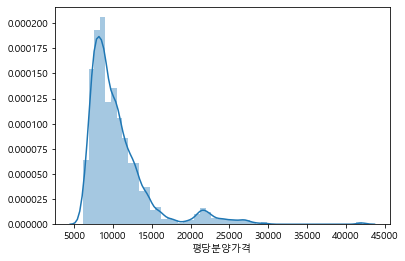

In [111]:
# distplot로 평당분양가격 표현

sns.distplot(price)

*http://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

*http://seaborn.pydata.org/examples/kde_ridgeplot.html

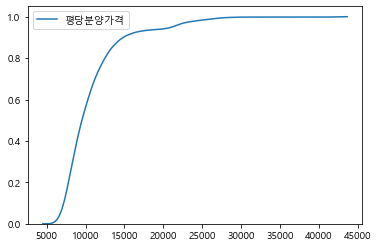

In [116]:
# sns.distplot(price, hist=False, rug=True)

sns.kdeplot(price, cumulative=True)

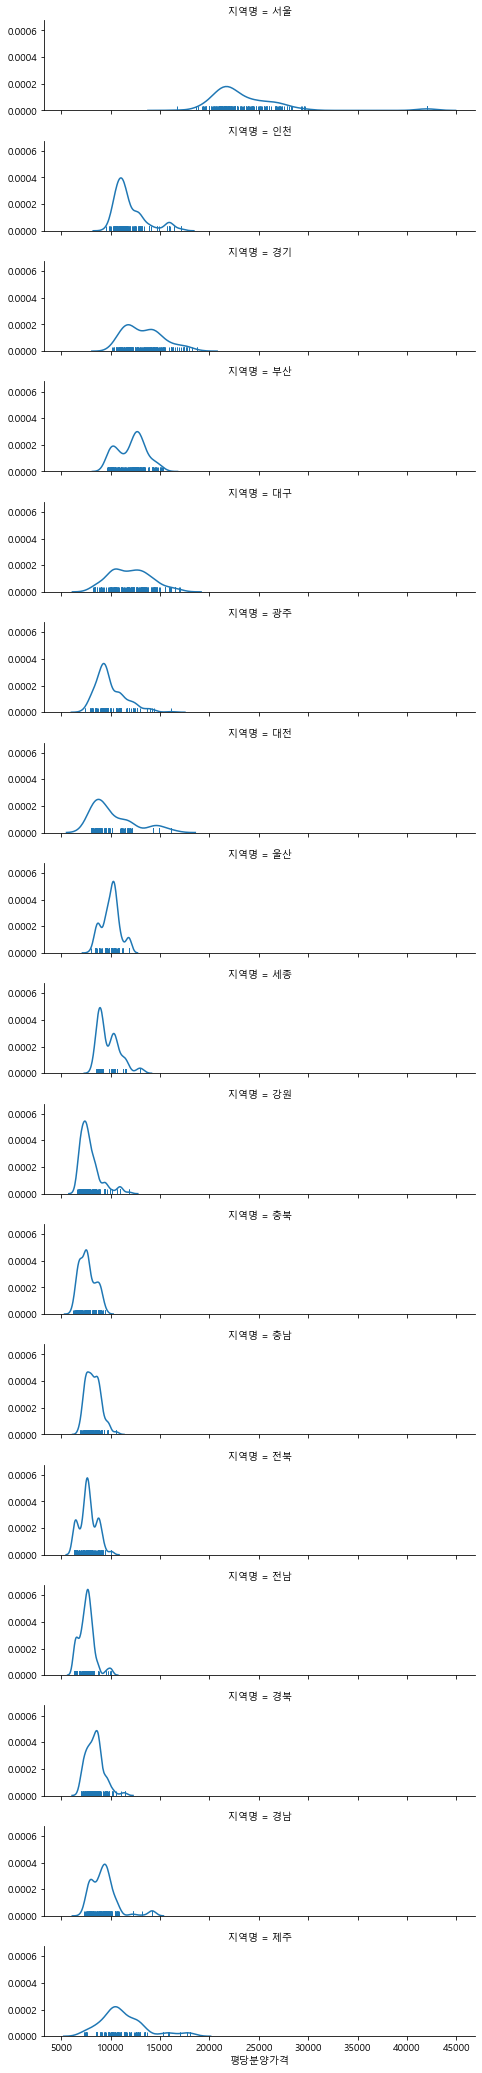

In [120]:
# subplot 표현

g = sns.FacetGrid(df_last, row="지역명", height= 1.7, aspect=4,)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

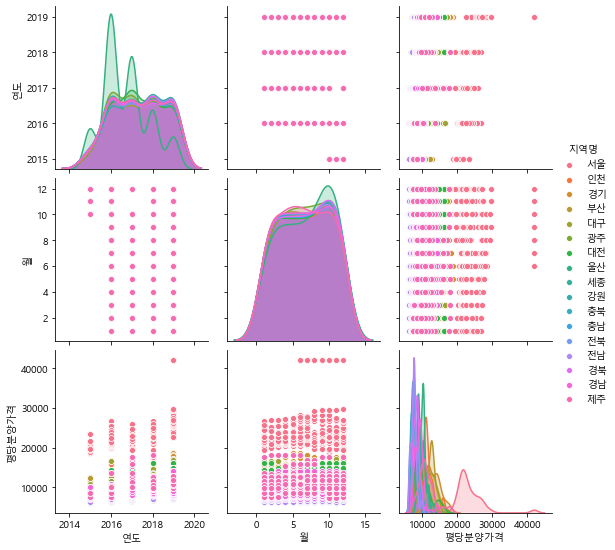

In [64]:
# pairplot 그리기

df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(),
                              ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [65]:
# 규모구분(전용면적)별로 value_counts를  사용해서 데이터 집계

df_last["전용면적"].value_counts()

60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
전체          867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [66]:
# 

pd.options.display.max_columns = 25

In [126]:
# df_first 변수에 담겨있는 데이터 정보

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [127]:
# 결측치 확인

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [68]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [69]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


### melt로 Tidy data 만들기

In [129]:
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [133]:
# df_first_melt 변수에 담겨진 컬럼의 이름
# ["지역명", "기간", "평당분양가격"]으로 변경

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [71]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### 연도와 월을 분리하기

In [72]:
date = "2013년12월"

In [135]:
# split을 통해 "년"을 기준으로 텍스트를 분리

date.split("년")

['2013', '12월']

In [137]:
#  리스트의 인덱싱을 사용해서 연도만 가져오기

date.split("년")[0]

'2013'

In [138]:
# 리스트의 인덱싱과 replace를 사용해서 월 삭제

date.split("년")[-1].replace("월", "")

'12'

In [75]:
# parse_year 라는 함수 만들기
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입


def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))

<class 'int'>


In [76]:
# 제대로 분리가 되었는지 확인

parse_year(date)

2013

In [139]:
# parse_month 라는 함수 만들기
# 월만 반환하도로고 하며, 반환하는 데이터는 int 타입

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

parse_month(date)

12

In [141]:
# 제대로 분리가 되었는지 확인

parse_month(date)

12

In [145]:
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담는다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [146]:
# df_first_melt 변수에 담긴  데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담는다. 


df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [148]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 한다.
# sample을 활용해서 데이터를 미리보기

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
3002,광주,2018,9,2931.0,9672.3,60㎡~85㎡


In [151]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [153]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [157]:
# 최근 데이터가 담긴 df_last에는 전용면적이 있다.
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담기

df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [161]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담는다

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


### concat으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [164]:
# df_first_prepare 와 df_last_prepare 합친다

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [167]:
df.tail()

,지역명,연도,월,평당분양가격
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
4330,제주,2019,12,12810.6


In [166]:
# 연도별로 데이터가 몇개씩 있는지 value_counts

df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기 

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [170]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피벗테이블로

t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


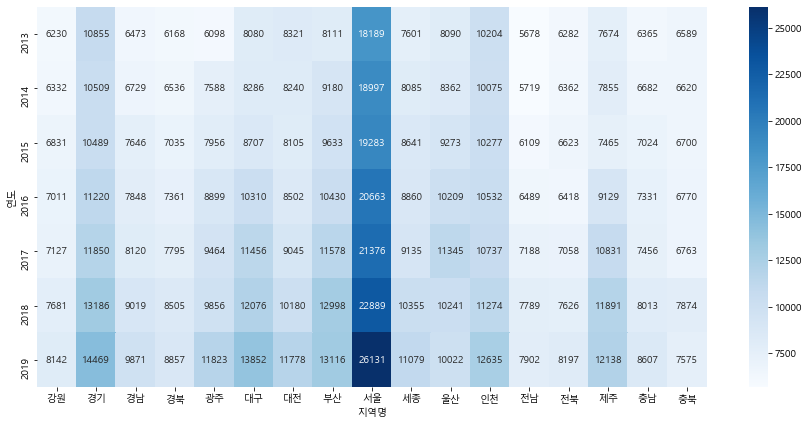

In [171]:
# 위에서 그린 피봇테이블을 히트맵으로 표현

plt.figure(figsize=(15,  7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")



In [172]:
# transpose 사용하면 행과 열을 바꿔줄 수 있다

t.transpose()
# transpose() = T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


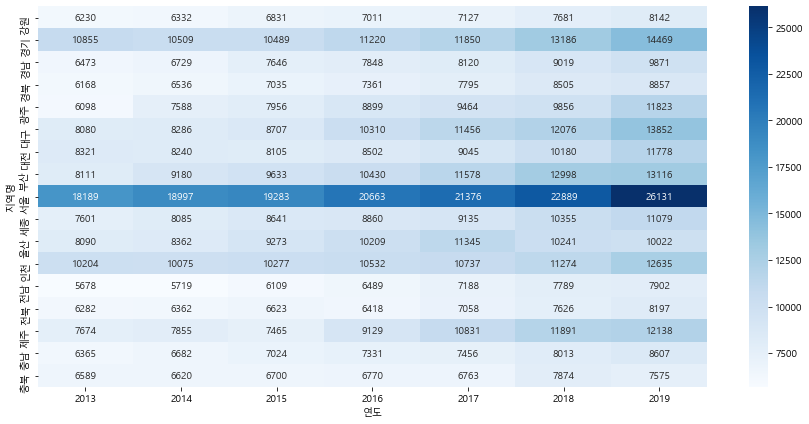

In [173]:
# 바뀐 행과 열 히트맵으로 표현

plt.figure(figsize=(15,  7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

In [177]:
# Groupby로 그려보기 . 인덱스에 ["연도", "지역명"]을 넣고 그려보기

g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


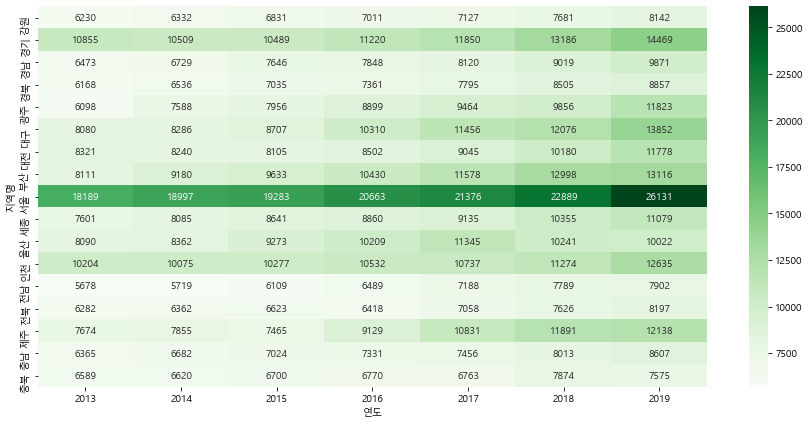

In [175]:
# 히트맵으로 그려보기

plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

In [ ]:
# barplot으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")


In [ ]:
# pointplot 으로 연도별 평당 분양가격 

plt.figure(figsize(12, 4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)

In [ ]:
# 서울만 barplot

df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도", y="평당분양가격"


In [ ]:
# 연도별 평당분양가격 boxplot

sns.boxplot(data=df, x="연도", y="평당분양가격")



In [ ]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")


In [ ]:
plt.figure(figsize(10, 4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

In [ ]:
# 연도별 평당분양가격 swarmplot

plt.figure(figsize=(12, 5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)



In [ ]:
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)


In [ ]:
# barplot 으로 지역별 평당분양가격 

plt.figure(figsize(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")



In [ ]:
# boxplot 으로 지역별 평당분양가격

plt.figure(figsize(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")


In [ ]:
plt.figure(figsize(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

In [ ]:
# violinplot으로 지역별 평당분양가격

plt.figure(figsize(25, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

In [ ]:
# swarmplot으로 지역별 평당분양가격

plt.figure(figsize(25, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격")